# Random forest con scikit-learn - diabetes


In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
#Cargamos dataset a utilizar
df = pd.read_csv('pima-indians-diabetes.csv')

## Exploración de datos

In [3]:
#Visualizacion del dataframe
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
#Renombramos las columnas
#columns_to_replace = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df.columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [13]:
#Verificacion de datos
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [12]:
#Analizamos el shape del objeto
df.shape

(767, 9)

In [14]:
#Visualizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Entrenamiento de random forest con scikit-learn

In [15]:
#Separamos en X e y
X = df.drop(['class'],axis=1)
y = df['class']

In [16]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=00000)


In [32]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=20,random_state=00000)

In [33]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [34]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [35]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_true=y_train,y_pred=y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_true=y_test,y_pred=y_test_pred)

print('El accuracy score en train es:', train_accuracy)
print('El accuracy score en test es:', test_accuracy)

El accuracy score en train es: 0.996268656716418
El accuracy score en test es: 0.7532467532467533


In [36]:
#Verificamos el feature importances
features_importances_df = pd.DataFrame(
    {'feature': list(X.columns), "importance": random_forest.feature_importances_}).sort_values('importance', ascending=False)

# Mostrar
features_importances_df

,feature,importance
1,plas,0.219213
5,mass,0.196958
6,pedi,0.136802
7,age,0.117454
2,pres,0.088821
4,test,0.084842
0,preg,0.083936
3,skin,0.071975


C:\Users\User\AppData\Local\Temp\ipykernel_12872\3961974169.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_importances_df.feature, y=features_importances_df.importance,palette='bright')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'plas'),
  Text(1, 0, 'mass'),
  Text(2, 0, 'pedi'),
  Text(3, 0, 'age'),
  Text(4, 0, 'pres'),
  Text(5, 0, 'test'),
  Text(6, 0, 'preg'),
  Text(7, 0, 'skin')])

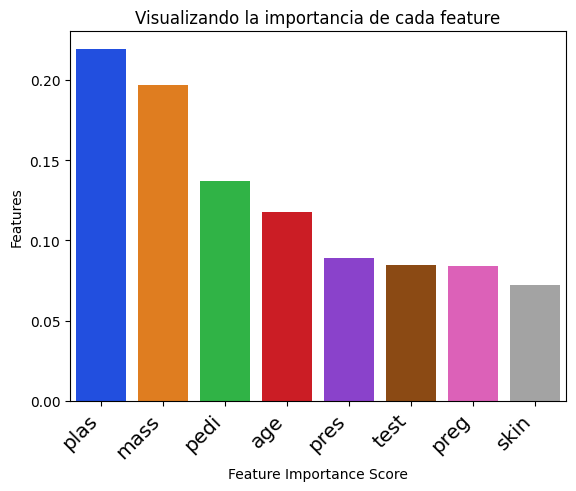

In [37]:
sns.barplot(x=features_importances_df.feature, y=features_importances_df.importance,palette='bright')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada feature')
plt.xticks(rotation=45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'x-large')


**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**